# Passenger Flight Satisfaction

**About:** this dataset contains information about US airline passanger satisfaction, as well as some demographic inforamtion about them.

**My goals are:**
- find out which factors are most correlated with passenger satisfaction
- build a model that can predict passenger satisfaction using data that we have
- see which aspects of the flight airline should focus on improving to raise passenger satisfaction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [2]:
df1 = pd.read_csv(r'C:\Users\laimi\Desktop\Studies\Data Analytics\Python\data\flight_satisfaction\train.csv')
df2 = pd.read_csv(r'C:\Users\laimi\Desktop\Studies\Data Analytics\Python\data\flight_satisfaction\test.csv')

In [3]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
129875,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
129879,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [9]:
df[df['Arrival Delay in Minutes'].isnull()]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,24072,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
128037,24133,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
128205,24301,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,...,4,3,3,5,5,4,4,0,NaN,satisfied
129032,25128,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


<AxesSubplot:>

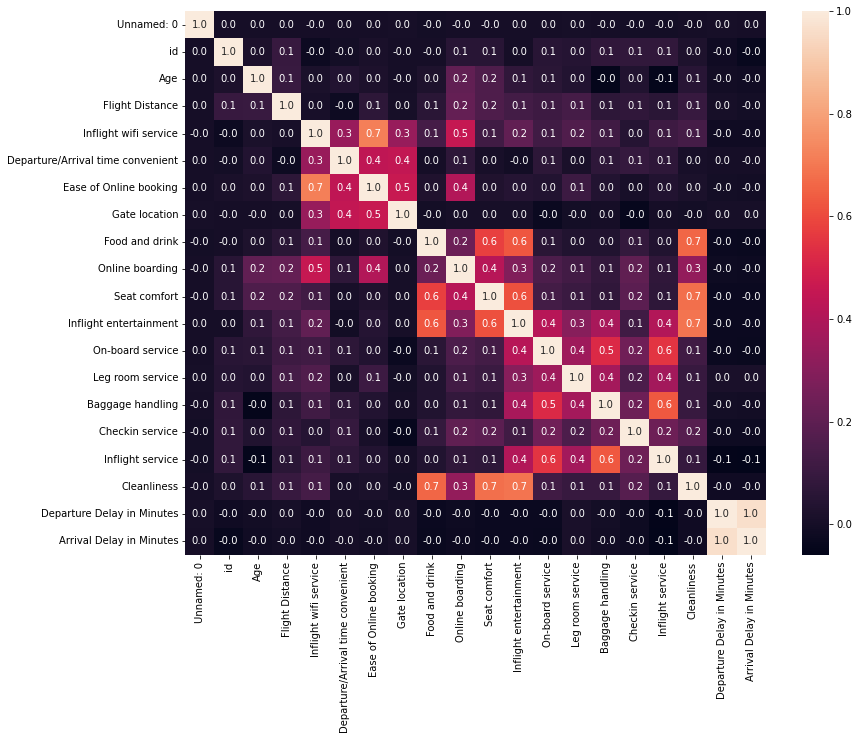

In [10]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

Since there are some null values in 'Arrival Delay' column and it is perfectly correlated to 'Departure Delay',
I will drop that column later on.

Now let's explore categorical variables a bit more:

In [11]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [12]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [13]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

At first glance, we have:
- 3 redundant columns that can be dropped ('id', 'Unnamed: 0', and 'Arrival Delay').
- 4 columns with categorical demographic and travel data ('Gender', 'Customer Type', 'Type of Travel', and 'Class')
- 4 columns with numerical demographic and travel data (Age, Flight Distance, Departure Delay and Arrival Delay)
- 9 columns with categorical oridnal data, indicationg the level of satisfaction regarding various aspects of travel on a scale 0-5.

I would expect Loyal Customers flying Business Class to be more satisfied with their flights overall.
I would also expect high correlation between overall satisfaction and higher scores to the 9 questions aout the flight.

Let's visualise passenger distribution by category, and their satisfaction levels.

In [14]:
def draw_pie_chart(column, title, **kwarg):
    
    explode = np.zeros(column.nunique())
    explode[:-1] = 0.1
    
    column.value_counts().plot(
        kind='pie',
        title=title,
        ylabel='',
        explode=explode,
        wedgeprops={'edgecolor':'k'},
        shadow=True,
        autopct='%1.2f%%',
        **kwarg)
    
    plt.plot

In [15]:
def draw_kde_plot(column, **kwarg):
    
    sns.set_style('whitegrid')
    
    ax = sns.kdeplot(
        x=column,
        data=satisfied,
        shade=True,
        alpha=0.6,
        color='b',
        **kwarg
    )
    
    ax = sns.kdeplot(
        x=column,
        data=dissatisfied,
        shade=True,
        alpha=0.6,
        color='r',
        **kwarg
    )
    
    ax.set(ylabel=None)
    ax.yaxis.set_ticklabels([])

In [16]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

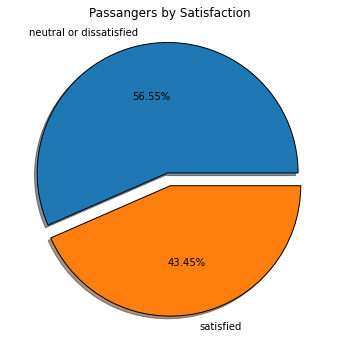

In [17]:
sns.set_style(style='whitegrid')
draw_pie_chart(df['satisfaction'], 'Passangers by Satisfaction', figsize=(6,6))

We have a bit more dissatisfied passangers, but overall a good balance.

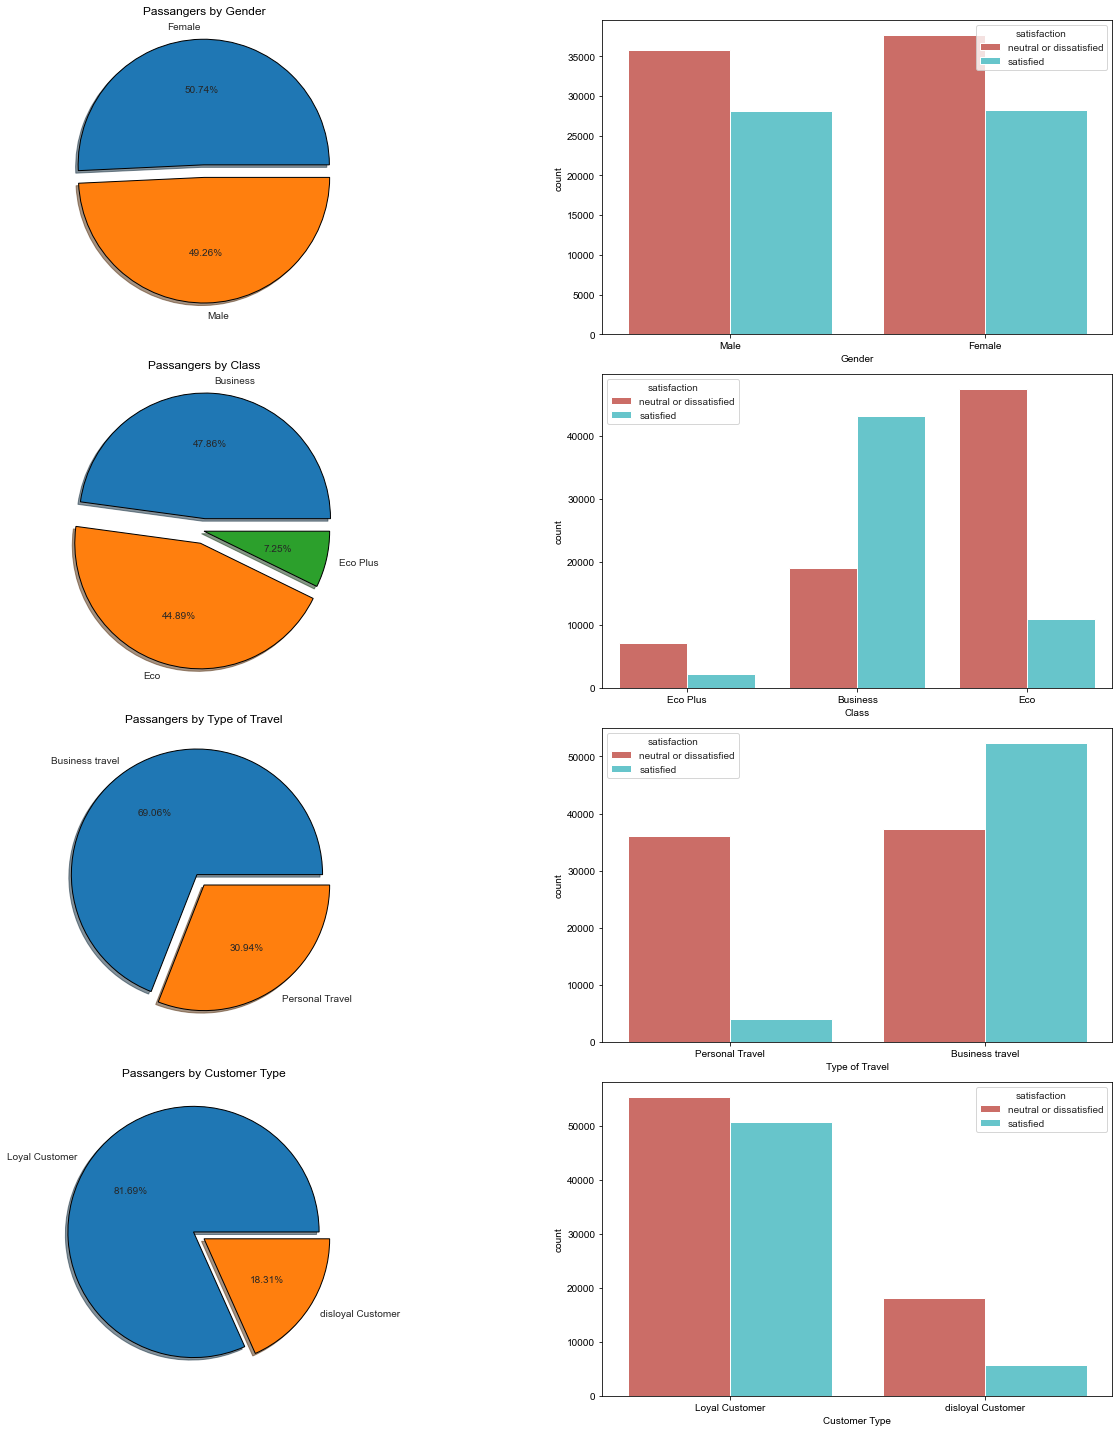

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20), gridspec_kw={'width_ratios':[2, 1]})
axes = axes.ravel()

sns.set_style(style='whitegrid')

draw_pie_chart(df['Gender'], 'Passangers by Gender', ax=axes[0])
sns.countplot(x='Gender', data=df, hue='satisfaction', ax=axes[1], palette='hls')

draw_pie_chart(df['Class'], 'Passangers by Class', ax=axes[2])
sns.countplot(x='Class', data=df, hue='satisfaction', ax=axes[3], palette='hls')

draw_pie_chart(df['Type of Travel'], 'Passangers by Type of Travel', ax=axes[4])
sns.countplot(x='Type of Travel', data=df, hue='satisfaction', ax=axes[5], palette='hls')

draw_pie_chart(df['Customer Type'], 'Passangers by Customer Type', ax=axes[6])
sns.countplot(x='Customer Type', data=df, hue='satisfaction', ax=axes[7], palette='hls')

plt.tight_layout()

**Gender:**
- Passengers more or less equally divided by gender
- Neither men nor women seem to be more likely to be satisfied or dissatisfied
    
**Class:**
- Most people travel Business or Eco, approximately equally divided (~45% each)
- A small percentage of people fly Eco Plus (<10%)
- Eco Plus and Eco passangers tend to be more dissatisfied
- Business Class passangers tend to be more satisfied
    
**Type of Travel:**
- About 70% of people travel for Business, and about 30% for personal reasons
- Passengers traveling for personal reasons are much more likely to be dissatisfied
- Passengers traveling for business reasons are more likely to be satisfied
    
**Customer Type:**
- Loyal customers are about as likely to be satisfied as dissatisfied
- Disloyal passangers tend to be around 3 time more dissatisfied than satisfied

**Judging by this, I would say Passanger Class, Type of Travel and Loyalty should be best predictors for satisfaction from these categorical variables.**

In [19]:
# Dropping redundant columns:

df = df.drop(columns=['Unnamed: 0', 'id', 'Arrival Delay in Minutes'])

Now let's have a look at continuous variables.

In [20]:
satisfied = df[df['satisfaction'] == 'satisfied']
dissatisfied = df[df['satisfaction'] == 'neutral or dissatisfied']

(-10.0, 100.0)

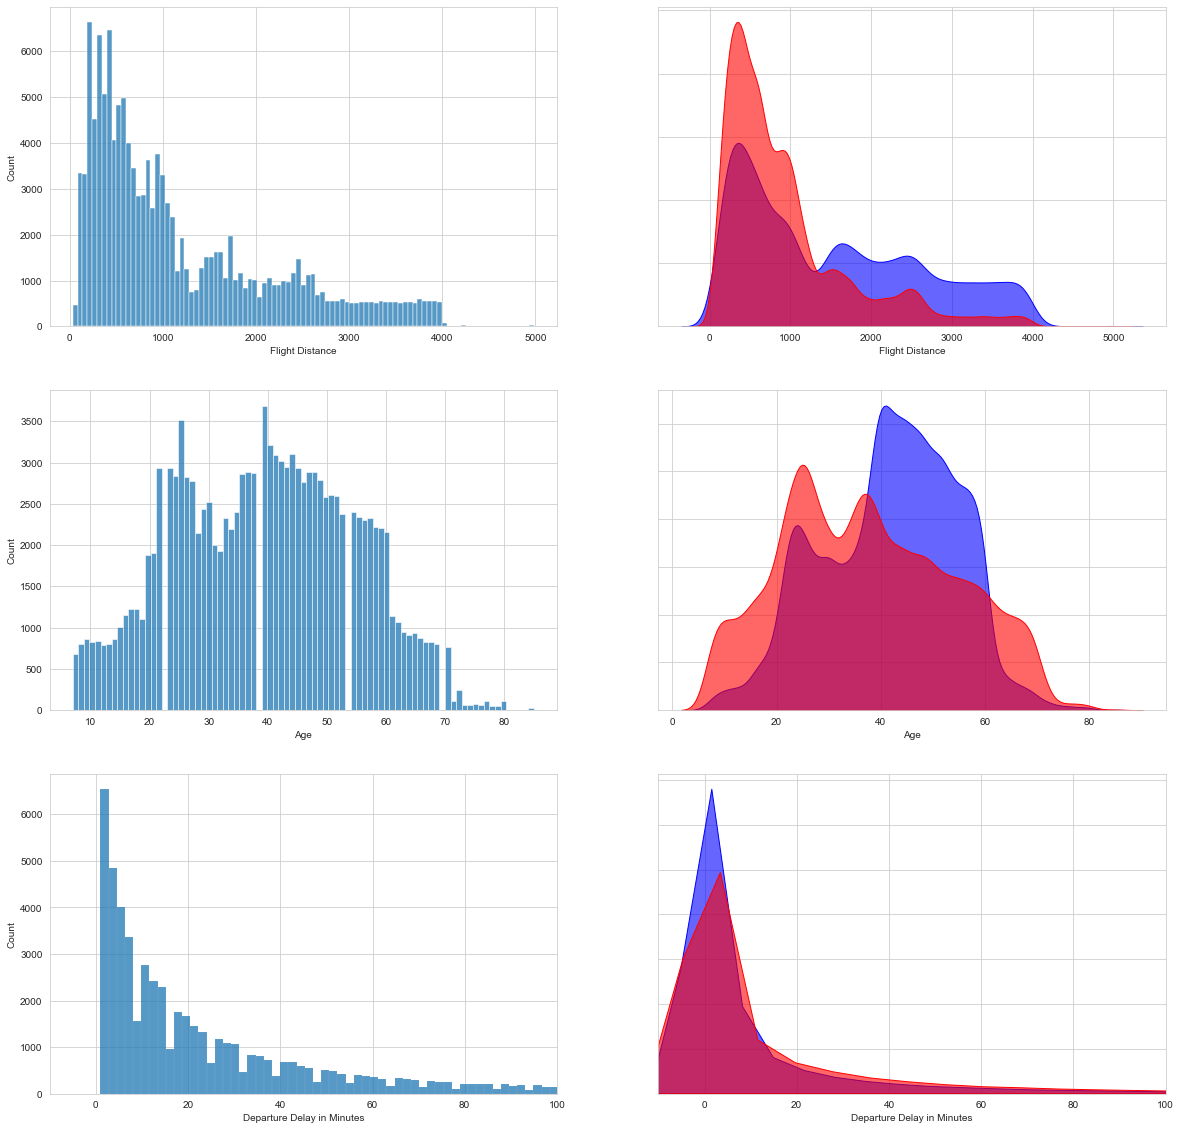

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
axes = axes.ravel()

sns.histplot(x='Flight Distance', data=df, ax=axes[0])
draw_kde_plot('Flight Distance', ax=axes[1])

sns.histplot(x='Age', data=df, ax=axes[2])
draw_kde_plot('Age', ax=axes[3])

sns.histplot(x='Departure Delay in Minutes', 
             data=df[df['Departure Delay in Minutes'] > 0], 
             ax=axes[4])
draw_kde_plot('Departure Delay in Minutes', ax=axes[5])
axes[4].set_xlim(-10, 100)
axes[5].set_xlim(-10, 100) 
# I've excluded no-delay (0min) values and set limit to 100mins due to these extremes making the graph unreadable

- Seems like the majority of flights are <1200km long, and result in more dissatisfied passangers.
- Flights over 1200km are less popular, but result in more satisfied passangers.
- There is an interesting peak in satisfied passangers between ages 38-61, perhaps that represents business-class-flying population 
- Unsurprisingly, people are more satisfied when flight departs on time.

In [22]:
# I need to transpose data to long format for a bar plot:

ordinal_columns = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [23]:
grouped = df.groupby('satisfaction').mean()[ordinal_columns].reset_index()
grouped

,satisfaction,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,neutral or dissatisfied,2.398423,3.130221,2.549393,2.980055,2.958422,2.658621,3.037998,2.892433,3.019537,2.990443,3.374912,3.042967,3.389601,2.932800
1,satisfied,3.158609,2.963068,3.026955,2.972850,3.525448,4.025856,3.966417,3.964202,3.856171,3.820054,3.966914,3.649004,3.970990,3.746509


In [24]:
grouped_long = grouped.melt(id_vars='satisfaction')
grouped_long

,satisfaction,variable,value
0,neutral or dissatisfied,Inflight wifi service,2.398423
1,satisfied,Inflight wifi service,3.158609
2,neutral or dissatisfied,Departure/Arrival time convenient,3.130221
3,satisfied,Departure/Arrival time convenient,2.963068
4,neutral or dissatisfied,Ease of Online booking,2.549393
5,satisfied,Ease of Online booking,3.026955
6,neutral or dissatisfied,Gate location,2.980055
7,satisfied,Gate location,2.972850
8,neutral or dissatisfied,Food and drink,2.958422
9,satisfied,Food and drink,3.525448


In [25]:
# I want to clearly see the differences in ratings between the groups

difference = pd.DataFrame(grouped.iloc[1, 1:].subtract(grouped.iloc[0, 1:])).reset_index()

In [26]:
difference.columns = ['feature', 'rating_difference']

In [27]:
difference = difference.sort_values('rating_difference', ascending=False).reset_index(drop=True)
difference

,feature,rating_difference
0,Online boarding,1.367235
1,Inflight entertainment,1.071769
2,Seat comfort,0.92842
3,On-board service,0.836634
4,Leg room service,0.829611
5,Cleanliness,0.813709
6,Inflight wifi service,0.760186
7,Checkin service,0.606037
8,Baggage handling,0.592002
9,Inflight service,0.581388


In [28]:
order_list = difference['feature'].unique() # this is to make sure both graphs below are ordered the same way

<AxesSubplot:xlabel='rating_difference', ylabel='feature'>

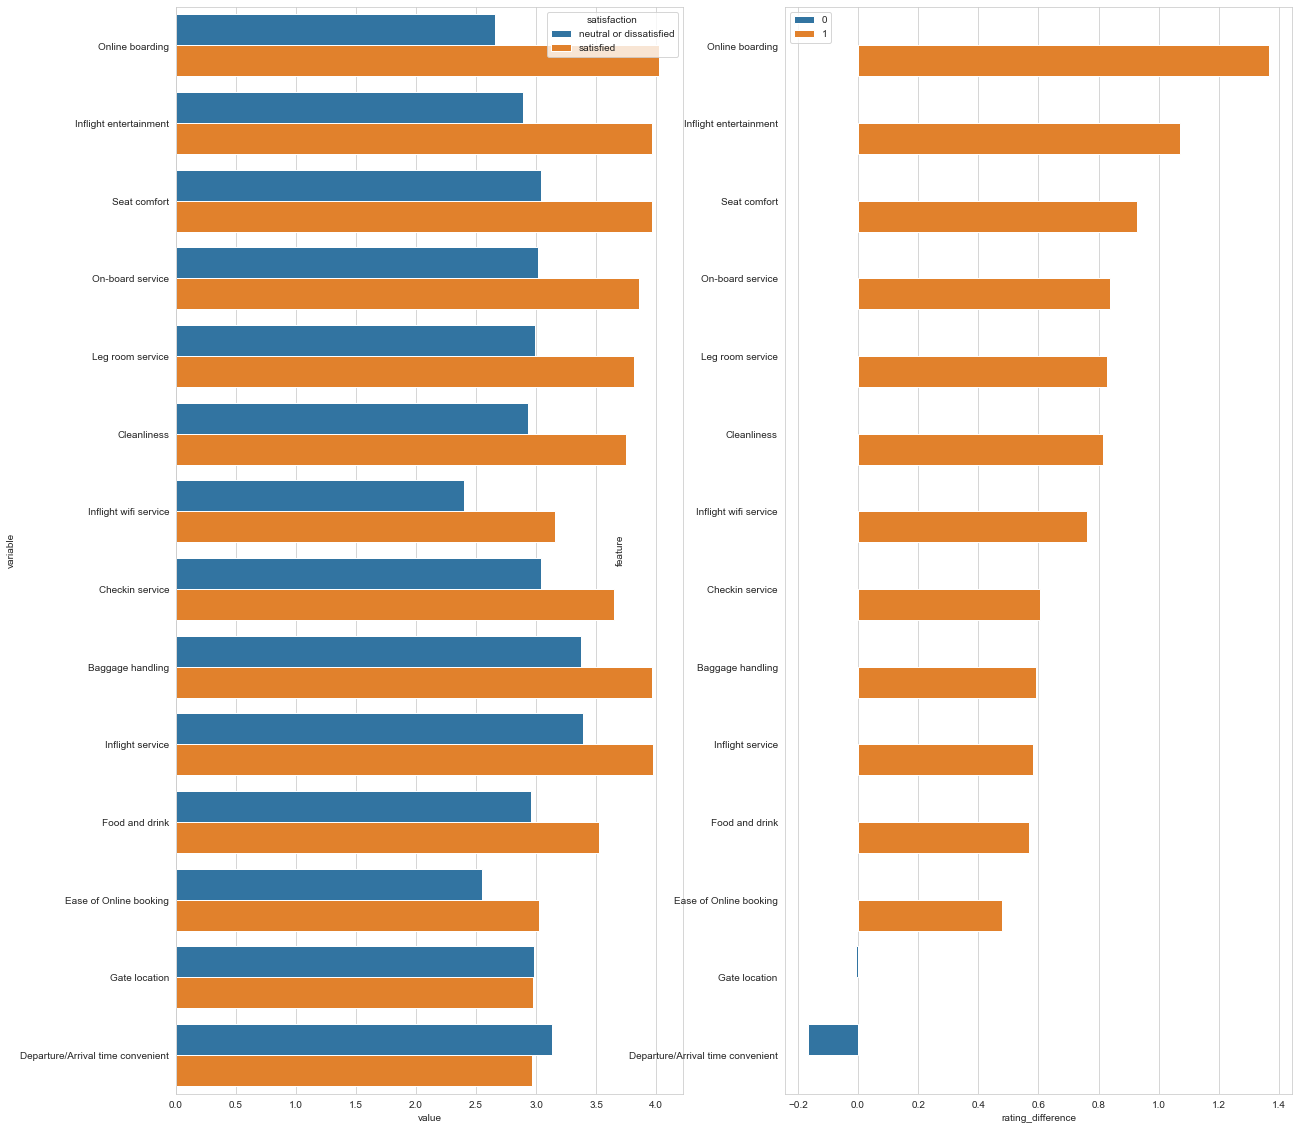

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
axes = axes.ravel()

sns.barplot(y='variable', x='value', data=grouped_long, orient='h', hue='satisfaction', ax=axes[0],
           order=order_list)

colors = [1 if dif >= 0 else 0 for dif in difference['rating_difference']]

sns.barplot(y='feature', x='rating_difference', data=difference, orient='h',
            hue=colors, ax=axes[1])

- As expected, satisfied customers gave higher scores to most of the services
- However, 'Gate Location' and 'Deaprture/Arrival time convenient' don't seem to affect overall satisfaction much.
- Largest differences in ratings between the groups seem to be for:
    1. 'Online Boarding',
    2. 'Inflight Entertainment',
    3. 'Seat Comfort',
    4. 'Onboard Service',
    5. 'Leg room Service'
- I would expect these services to contribute more to the overall satisfaction

## Satisfaction Prediction
### Random Forest

In [295]:
processed_df = df.copy()
processed_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


In [296]:
processed_df['satisfaction'] = processed_df['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied':0})

An earlier exploration showed that passengers in some categories ('Business Class', 'Business Travel') 
are much more likely to be satisfied than in others ('Eco class', 'Personal Travel').
The improvement didn't seem to be linear though, so I will use Means Encoding.

In [297]:
processed_df.groupby('Type of Travel').mean()['satisfaction']

Type of Travel
Business travel    0.583724
Personal Travel    0.101326
Name: satisfaction, dtype: float64

In [298]:
processed_df['Type of Travel'].replace({'Personal Travel':0.101, 'Business travel':0.584}, inplace = True)
processed_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,0.101,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,0
1,Male,disloyal Customer,25,0.584,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,0
2,Female,Loyal Customer,26,0.584,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,1
3,Female,Loyal Customer,25,0.584,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,0
4,Male,Loyal Customer,61,0.584,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,1


In [299]:
dummies = pd.get_dummies(processed_df[['Gender', 'Customer Type']], drop_first=True)

processed_df = pd.concat([processed_df.drop(['Gender', 'Customer Type'], axis=1), dummies], axis=1)

processed_df.head()

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer
0,13,0.101,Eco Plus,460,3,4,3,1,5,3,...,4,3,4,4,5,5,25,0,1,0
1,25,0.584,Business,235,3,2,3,3,1,3,...,1,5,3,1,4,1,1,0,1,1
2,26,0.584,Business,1142,2,2,2,2,5,5,...,4,3,4,4,4,5,0,1,0,0
3,25,0.584,Business,562,2,5,5,5,2,2,...,2,5,3,1,4,2,11,0,0,0
4,61,0.584,Business,214,3,3,3,3,4,5,...,3,4,4,3,3,3,0,1,1,0


In [300]:
# adding an extra feature

processed_df['no_delay'] = processed_df['Departure Delay in Minutes'].apply(lambda x: 1 if x == 0 else 0)
processed_df.head()

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,no_delay
0,13,0.101,Eco Plus,460,3,4,3,1,5,3,...,3,4,4,5,5,25,0,1,0,0
1,25,0.584,Business,235,3,2,3,3,1,3,...,5,3,1,4,1,1,0,1,1,0
2,26,0.584,Business,1142,2,2,2,2,5,5,...,3,4,4,4,5,0,1,0,0,1
3,25,0.584,Business,562,2,5,5,5,2,2,...,5,3,1,4,2,11,0,0,0,0
4,61,0.584,Business,214,3,3,3,3,4,5,...,4,4,3,3,3,0,1,1,0,1


In [301]:
corr_df = processed_df.copy() # I will need this version of df with Class variable untouched later on for correlation

In [302]:
processed_df.groupby('Class').mean()['satisfaction']

Class
Business    0.694434
Eco         0.187673
Eco Plus    0.246414
Name: satisfaction, dtype: float64

In [303]:
processed_df['Class'].replace({'Eco':0.188, 'Eco Plus':0.246, 'Business':0.694}, inplace=True)
processed_df.head()

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,no_delay
0,13,0.101,0.246,460,3,4,3,1,5,3,...,3,4,4,5,5,25,0,1,0,0
1,25,0.584,0.694,235,3,2,3,3,1,3,...,5,3,1,4,1,1,0,1,1,0
2,26,0.584,0.694,1142,2,2,2,2,5,5,...,3,4,4,4,5,0,1,0,0,1
3,25,0.584,0.694,562,2,5,5,5,2,2,...,5,3,1,4,2,11,0,0,0,0
4,61,0.584,0.694,214,3,3,3,3,4,5,...,4,4,3,3,3,0,1,1,0,1


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = processed_df.drop('satisfaction', axis=1).values
y = processed_df['satisfaction']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [55]:
scaler.fit(X_train)

MinMaxScaler()

In [56]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators=200)
rfc_start = time.time()
rfc.fit(X_train, y_train)
rfc_end = time.time()
rfc_training_time = rfc_end - rfc_start
print(f'training time: {rfc_training_time}s')

training time: 42.421112298965454s


In [60]:
rfc_pred = rfc.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(rfc.score(X_test, y_test))

0.9621702083974951


In [63]:
print(confusion_matrix(y_test,rfc_pred))

[[21550   429]
 [ 1045 15940]]


In [118]:
rfc_report = classification_report(y_test, rfc_pred, output_dict=True, digits=4)
rfc_class_report = pd.DataFrame(rfc_report)
print(classification_report(y_test, rfc_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9538    0.9805    0.9669     21979
           1     0.9738    0.9385    0.9558     16985

    accuracy                         0.9622     38964
   macro avg     0.9638    0.9595    0.9614     38964
weighted avg     0.9625    0.9622    0.9621     38964



In [69]:
rfc_class_rep

,0,1,accuracy,macro avg,weighted avg
precision,0.953751,0.973792,0.96217,0.963771,0.962487
recall,0.980481,0.938475,0.96217,0.959478,0.962170
f1-score,0.966931,0.955807,0.96217,0.961369,0.962082
support,21979.000000,16985.000000,0.96217,38964.000000,38964.000000


- of all passegners classified as 'satisfied', 97% were truly so
- of all passegners classified as 'dissatisfied or neutral', 95% were truly so
- of all existing satisfied passengers, the model 'found' 94%
- of all existing dissatisfied or neutral passengers, the model 'found' 98%
- overall, the model classified 96% of passengers correctly

### Neural Network

In [75]:
processed_df.head()

,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,no_delay
0,13,0.101,0.246,460,3,4,3,1,5,3,...,3,4,4,5,5,25,0,1,0,0
1,25,0.584,0.694,235,3,2,3,3,1,3,...,5,3,1,4,1,1,0,1,1,0
2,26,0.584,0.694,1142,2,2,2,2,5,5,...,3,4,4,4,5,0,1,0,0,1
3,25,0.584,0.694,562,2,5,5,5,2,2,...,5,3,1,4,2,11,0,0,0,0
4,61,0.584,0.694,214,3,3,3,3,4,5,...,4,4,3,3,3,0,1,1,0,1


In [76]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras_tuner.tuners import RandomSearch

In [77]:
model = Sequential()

In [78]:
X_train.shape

(90916, 22)

In [79]:
# looking for best hyperparameters using keras tuner:
# - number of layers
# - number of neurons in each layer
# - drop-out rate

def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      units=hp.Choice('units_', [21, 42]),
      activation='relu'))
  model.add(Dropout(
          hp.Choice('drop_rate', [0.2, 0.5])))
  for i in range(hp.Int('layers', 1, 2)):
      model.add(keras.layers.Dense(
          units=hp.Choice('units_' + str(i), [7, 11, 16, 21]),
          activation='relu'))
      model.add(Dropout(
          hp.Choice('drop_rate', [0.2, 0.5])))
  model.add(keras.layers.Dense(
      units=1,
      activation='sigmoid'))
  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy']
               )
               
  return model

In [80]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='best_nn_model2'
    )

INFO:tensorflow:Reloading Oracle from existing project my_dir\best_nn_model2\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\best_nn_model2\tuner0.json


In [81]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
units_ (Choice)
{'default': 21, 'conditions': [], 'values': [21, 42], 'ordered': True}
drop_rate (Choice)
{'default': 0.2, 'conditions': [], 'values': [0.2, 0.5], 'ordered': True}
layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
units_0 (Choice)
{'default': 7, 'conditions': [], 'values': [7, 11, 16, 21], 'ordered': True}
units_1 (Choice)
{'default': 7, 'conditions': [], 'values': [7, 11, 16, 21], 'ordered': True}


In [82]:
tuner.search(
    X_train, y_train,
    epochs=5,
    validation_data=(X_test, y_test)
    )

INFO:tensorflow:Oracle triggered exit


In [83]:
tuner.results_summary()

Results summary
Results in my_dir\best_nn_model2
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_: 42
drop_rate: 0.2
layers: 2
units_0: 11
units_1: 7
Score: 0.9455907940864563
Trial summary
Hyperparameters:
units_: 42
drop_rate: 0.5
layers: 1
units_0: 21
units_1: 7
Score: 0.940919816493988
Trial summary
Hyperparameters:
units_: 21
drop_rate: 0.2
layers: 1
units_0: 16
units_1: 11
Score: 0.9405091802279154
Trial summary
Hyperparameters:
units_: 21
drop_rate: 0.5
layers: 2
units_0: 21
units_1: 11
Score: 0.9265989263852438
Trial summary
Hyperparameters:
units_: 21
drop_rate: 0.5
layers: 2
units_0: 7
units_1: 21
Score: 0.9244002898534139


In [84]:
# Now I will build a model using best identified paramaters and train it.

model.add(Dense(units=42, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=11, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=7, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [86]:
nn_start = time.time()
model.fit(x=X_train,
          y=y_train,
          epochs=300,
          batch_size=100,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])
nn_end = time.time()
nn_training_time = (nn_end - nn_start)
print(f'training time: {nn_training_time}s')

Epoch 1/300
910/910 [==============================] - 6s 4ms/step - loss: 0.4224 - val_loss: 0.2552
Epoch 2/300
910/910 [==============================] - 3s 3ms/step - loss: 0.2710 - val_loss: 0.1865
Epoch 3/300
910/910 [==============================] - 3s 3ms/step - loss: 0.2172 - val_loss: 0.1600
Epoch 4/300
910/910 [==============================] - 3s 3ms/step - loss: 0.1937 - val_loss: 0.1439
Epoch 5/300
910/910 [==============================] - 3s 3ms/step - loss: 0.1777 - val_loss: 0.1343
Epoch 6/300
910/910 [==============================] - 3s 3ms/step - loss: 0.1674 - val_loss: 0.1319
Epoch 7/300
910/910 [==============================] - 3s 3ms/step - loss: 0.1640 - val_loss: 0.1257
Epoch 8/300
910/910 [==============================] - 3s 3ms/step - loss: 0.1577 - val_loss: 0.1234
Epoch 9/300
910/910 [==============================] - 3s 3ms/step - loss: 0.1532 - val_loss: 0.1231
Epoch 10/300
910/910 [==============================] - 3s 3ms/step - loss: 0.1505 - val_lo

<AxesSubplot:>

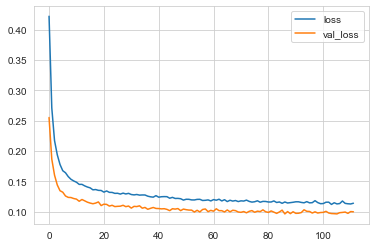

In [87]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [88]:
training_score = model.evaluate(X_train, y_train, verbose=0)
testing_score = model.evaluate(X_test, y_test, verbose=0)

In [89]:
training_score

0.09498002380132675

In [90]:
testing_score

0.09959062188863754

In [91]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [119]:
nn_report = classification_report(y_test, predictions, output_dict=True, digits=4)
nn_class_report = pd.DataFrame(nn_report)
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9465    0.9781    0.9620     21979
           1     0.9703    0.9285    0.9490     16985

    accuracy                         0.9565     38964
   macro avg     0.9584    0.9533    0.9555     38964
weighted avg     0.9569    0.9565    0.9563     38964



In [93]:
print(confusion_matrix(y_test, predictions))

[[21497   482]
 [ 1214 15771]]


In [94]:
# Saving the model as it takes a long time to compute
model.save('./nn_model.h5')

## Model comparison

In [222]:
def process_reports(report, model_name):
    
    accuracy = report.iloc[0,2]
    
    rep = report.rename(columns = {'0':'dissatisfied', '1':'satisfied'})
    rep = rep.drop(columns = ['macro avg', 'weighted avg'], index=['support'])
    rep = rep.transpose()
    rep['accuracy'] = accuracy
    rep = rep.drop(index='accuracy')
    rep['model'] = model_name
    rep = rep.reset_index()
    rep = rep.rename(columns={'index':'satisfaction'})
    
    return rep

In [224]:
nn_class_rep_processed = process_reports(nn_class_report, 'NN')
rfc_class_rep_processed = process_reports(rfc_class_report, 'RFC')

In [227]:
class_rep_merged = pd.concat([nn_class_rep_processed, rfc_class_rep_processed], axis = 0)

In [ ]:
model_comparison = class_rep_merged.melt(['satisfaction', 'model']).rename(columns={'value':'% correct'})

In [274]:
model_comparison

,satisfaction,model,variable,% correct
0,dissatisfied,NN,precision,0.946546
1,satisfied,NN,precision,0.970344
2,dissatisfied,RFC,precision,0.953751
3,satisfied,RFC,precision,0.973792
4,dissatisfied,NN,recall,0.978070
5,satisfied,NN,recall,0.928525
6,dissatisfied,RFC,recall,0.980481
7,satisfied,RFC,recall,0.938475
8,dissatisfied,NN,f1-score,0.962050
9,satisfied,NN,f1-score,0.948974


In [250]:
time_data = {'time': [nn_training_time, rfc_training_time],
             'model': ['NN', 'RFC']}                     

In [251]:
times_merged = pd.DataFrame.from_dict(time_data)
times_merged

,time,model
0,363.585972,NN
1,42.421112,RFC


Text(0.5, 1.0, 'Model Performance Comaprison')

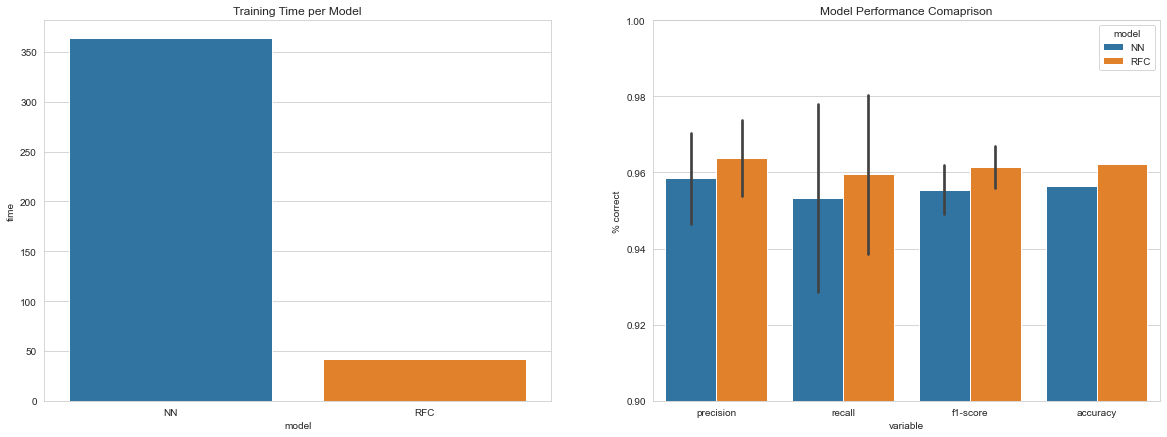

In [272]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
axes = axes.ravel()

sns.barplot(x='model', y='time', data=times_merged, ax=axes[0])
axes[0].set_title('Training Time per Model')

sns.barplot(x='variable', y='% correct', hue='model', data=model_comparison, ax=axes[1])
axes[1].set_ylim(0.9, 1)
axes[1].set_title('Model Performance Comaprison')

- Random Forest Classifier performed slightly better and had a much more efficient training time (8.5 times quicker than Neural Network model)

## Feature Importance

In [275]:
import eli5
from eli5.sklearn import PermutationImportance

In [287]:
perm_nn = PermutationImportance(
    estimator=model, 
    scoring='neg_mean_squared_error',
    random_state=42,
    n_iter=2)

perm_nn.fit(X_test, y_test)

PermutationImportance(estimator=<keras.engine.sequential.Sequential object at 0x000001C99B69E2B0>,
                      random_state=42, scoring='neg_mean_squared_error')

In [285]:
perm_rfc = PermutationImportance(
    estimator=rfc, 
    scoring='neg_mean_squared_error',
    random_state=42,
    n_iter=2)

perm_rfc.fit(X_test, y_test)

PermutationImportance(estimator=RandomForestClassifier(n_estimators=200),
                      random_state=42, scoring='neg_mean_squared_error')

### Neural Network

In [288]:
eli5.show_weights(perm_nn, feature_names=cols)

Weight,Feature
0.2482 ± 0.0020,Inflight wifi service
0.1491 ± 0.0013,Type of Travel
0.0961 ± 0.0023,Gate location
0.0585 ± 0.0014,Customer Type_disloyal Customer
0.0212 ± 0.0007,Class
0.0170 ± 0.0005,Online boarding
0.0130 ± 0.0006,Baggage handling
0.0122 ± 0.0003,Inflight service
0.0086 ± 0.0003,Ease of Online booking
0.0066 ± 0.0008,Seat comfort


- Top 5 features that hold the most weight:
       1. Inflight Wifi service
       2. Type of Travel
       3. Gate Location
       4. Customer loyalty
       5. Class
- Results are similar to what EDA was revealing. However I would have expected to see bigger weights for 'Online boarding'
- It is also strange to see big weight for 'Gate location' as there appeared to be virtually no difference in ratings for this feature between satisfied and unsatisfied passengers.

### Random Forest Classifier

In [286]:
eli5.show_weights(perm_rfc, feature_names=cols)

Weight,Feature
0.1329 ± 0.0029,Type of Travel
0.1250 ± 0.0023,Inflight wifi service
0.0505 ± 0.0007,Customer Type_disloyal Customer
0.0356 ± 0.0011,Online boarding
0.0251 ± 0.0013,Checkin service
0.0197 ± 0.0004,Seat comfort
0.0188 ± 0.0026,Baggage handling
0.0173 ± 0.0012,Inflight service
0.0165 ± 0.0011,Class
0.0157 ± 0.0009,Cleanliness


- Top 5 features for RFC:
    1. Type of Travel
    2. Inflight wifi service
    3. Customer Loyalty
    4. Online boarding
    5. Check-in service
    
- Interestinglly, 'Class' is at 9th place. Perhaps because it correlates heavily with Type of Travel and doesn't explain a lot of extra variance taken together.

**Let's have a look at rfc in-built value importance method:**

In [354]:
cols = processed_df.drop('satisfaction', axis=1).columns.to_list()

In [355]:
=rfc_value_importance = pd.DataFrame(
    {'feature': cols,
    'importance': rfc.feature_importances_}
).sort_values('importance', ascending=False).reset_index(drop=True)

In [356]:
rfc_value_importance

,feature,importance
0,Online boarding,0.169471
1,Inflight wifi service,0.139913
2,Class,0.104366
3,Type of Travel,0.097263
4,Inflight entertainment,0.053667
5,Seat comfort,0.049013
6,Leg room service,0.040968
7,Ease of Online booking,0.039366
8,Flight Distance,0.037998
9,Customer Type_disloyal Customer,0.037491


<AxesSubplot:xlabel='importance', ylabel='feature'>

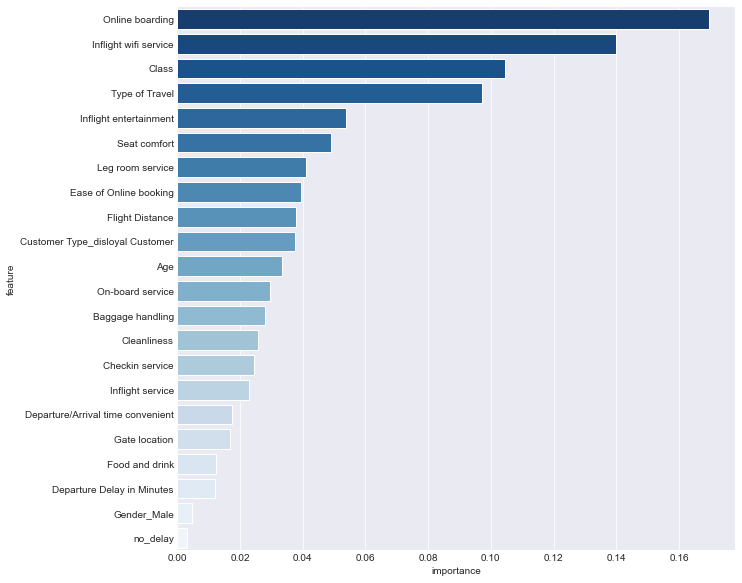

In [358]:
plt.figure(figsize=(10,10))
sns.set_style='whitegrid'
sns.barplot(x='importance', y='feature', data=rfc_value_importance, orient='h', palette='Blues_r')

Here the top features are as expected:
- Online borading
- Infilght wifi service
- Class
- Type of travel
- Inflight entertainment

At this point it is clear that with some variance between the models and ways of measuring feature importance, the same 5-7 features are deemed to be most important to predict passenger satisfaction.

### Are there differences in ratings between passengers flying different classes?

- We already discovered most important features associated with passenger satisfaction.
- Traveling Business Class or for business reasons tend to lead to more satisfied passengers - unsurprising, as Business Class comes with a lot of added comforts.
- However, the choice of the class is up to the passengers in most cases, and while this information can be used for satisfaction prediction, not so much for satisfaction improvement.
- **I want to see wheter the airline would need to focus on improving different flight aspects depending on which Class's satisfaction levels it wants to increase.**

In [360]:
def draw_class_corr(class_type, **kwarg):
    
    corr = corr_df.copy() # this is to avoid 'local variable' err
    
    corr.drop(columns=['Type of Travel', 'Age', 'Gender_Male','Customer Type_disloyal Customer'], inplace=True)
    # Since we are interested in the flight aspects that the airline can do something about,
    # I have dropped irrelevant columns here.
    
    if class_type == 'All':
        correlation = corr.corrwith(corr['satisfaction']).sort_values(ascending=True)[:-1]
    else:
        corr = corr[corr['Class'] == class_type]
        correlation = corr.corrwith(corr['satisfaction']).sort_values(ascending=True)[:-1]
    
    plt.style.use('seaborn-darkgrid')
    correlation.plot(kind='barh', figsize=(14,14), color='b', title=class_type, **kwarg)

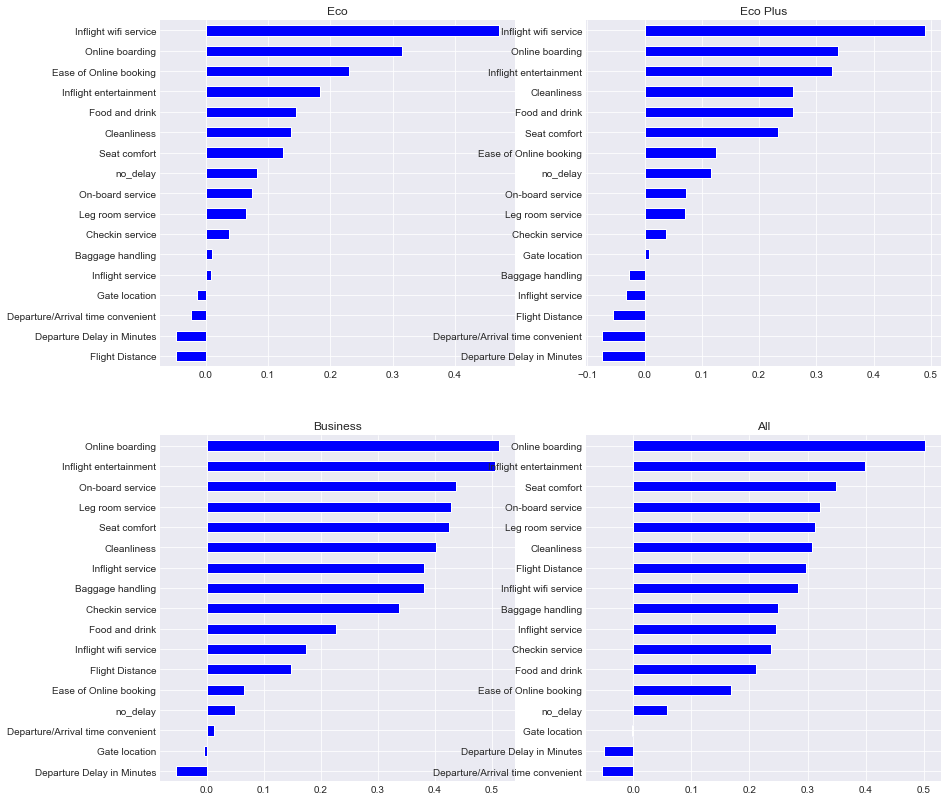

In [361]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
axes = axes.ravel()

draw_class_corr('Eco', ax=axes[0])

draw_class_corr('Eco Plus', ax=axes[1])

draw_class_corr('Business', ax=axes[2])

draw_class_corr('All', ax=axes[3])

- For people in Eco and Eco Plus groups, only three aspects of the flight have a correlation coefficient >0.3, namely Online Boarding, Inflight WiFi, and Inflight Entertainment (latter for Eco Plus only).
- For people in Business class, many more aspects had correlation coefficient >0.3
- It suggests that people flygin Eco and Eco Plus mostly care about the ease of boarding and being entertained on flight.
- Meanwhile, people in Business class have higher demands, and require more flight aspects to be of higher standard. 

## Conclusions

**Satisfaction prediction:**
- The data collected by the airline is sufficient to build a model predicting passenger satisfaction with ~96% accuracy.
- Random Forest Classifier was quicker to train and performed slightly better than Neural Network model, with overall accuracy 96.2%
- Class, Type of Travel, Online Boarding, and Inflight WiFi were among the most important predictors of overall satisfaction.

**Satisfaction improvement:**
- Ensuring a hassle-free onborading process and a good-quality inflight WiFi service would be recomended to the airline in order to increase passenger satisfaction if Eco and Eco Plus classes.
- To increase Business Class passenger satisfaction the airline needs to provide a consistently good service in most of the fliht aspects. Interestingly, departure delays, gate location, inflight WiFi and Food and Drink quality seem to be less important for Business Class passengers.
